In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing

In [4]:
from google.colab import files
import io
data = files.upload()
df2 = pd.read_csv(io.BytesIO(data['d.csv']))

Saving d.csv to d.csv


In [5]:
y=df2['label'].values
X=df2.drop(['label'],axis=1)
X.head(5)

,f1,f2
0,0.450564,1.074305
1,0.085632,0.967682
2,0.117326,0.971521
3,0.982179,-0.380408
4,-0.720352,0.955850


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13400, 2)
(6600, 2)
(13400,)
(6600,)


In [7]:
from tensorflow.keras.layers import Dense,Input,Activation
from tensorflow.keras.models import Model
import random as rn

In [8]:
class Callback(object):
    
    """Abstract base class used to build new callbacks.
      Attributes:
          params: dict. Training parameters
              (eg. verbosity, batch size, number of epochs...).
          model: instance of `keras.models.Model`.
              Reference of the model being trained.
          validation_data: Deprecated. Do not use.
      The `logs` dictionary that callback methods
      take as argument will contain keys for quantities relevant to
      the current batch or epoch.
      Currently, the `.fit()` method of the `Model` class
      will include the following quantities in the `logs` that
      it passes to its callbacks:
          on_epoch_end: logs include `acc` and `loss`, and
          optionally include `val_loss`
          (if validation is enabled in `fit`), and `val_acc`
          (if validation and accuracy monitoring are enabled).
          on_batch_begin: logs include `size`,
          the number of samples in the current batch.
          on_batch_end: logs include `loss`, and optionally `acc`
            (if accuracy monitoring is enabled).
      """

    def __init__(self):
        self.validation_data = None
        self.model = None
        # Whether this Callback should only run on the chief worker in a
        # Multi-Worker setting.
        # TODO(omalleyt): Make this attr public once solution is stable.
        self._chief_worker_only = None

    def set_params(self, params):
        self.params = params

    def set_model(self, model):
        self.model = model

    def on_batch_begin(self, batch, logs=None):
        """A backwards compatibility alias for `on_train_batch_begin`."""

    def on_batch_end(self, batch, logs=None):
        """A backwards compatibility alias for `on_train_batch_end`."""

    def on_epoch_begin(self, epoch, logs=None):
        """Called at the start of an epoch.
        Subclasses should override for any actions to run. This function should only
        be called during TRAIN mode.
        Arguments:
            epoch: integer, index of epoch.
            logs: dict. Currently no data is passed to this argument for this method
              but that may change in the future.
        """

    def on_epoch_end(self, epoch, logs=None):
        """Called at the end of an epoch.
        Subclasses should override for any actions to run. This function should only
        be called during TRAIN mode.
        Arguments:
            epoch: integer, index of epoch.
            logs: dict, metric results for this training epoch, and for the
              validation epoch if validation is performed. Validation result keys
              are prefixed with `val_`.
        """

    def on_train_batch_begin(self, batch, logs=None):
        """Called at the beginning of a training batch in `fit` methods.
        Subclasses should override for any actions to run.
        Arguments:
            batch: integer, index of batch within the current epoch.
            logs: dict. Has keys `batch` and `size` representing the current batch
              number and the size of the batch.
        """
        # For backwards compatibility.
        self.on_batch_begin(batch, logs=logs)

    def on_train_batch_end(self, batch, logs=None):
        """Called at the end of a training batch in `fit` methods.
        Subclasses should override for any actions to run.
        Arguments:
            batch: integer, index of batch within the current epoch.
            logs: dict. Metric results for this batch.
        """
        # For backwards compatibility.
        self.on_batch_end(batch, logs=logs)

    def on_test_batch_begin(self, batch, logs=None):
        """Called at the beginning of a batch in `evaluate` methods.
        Also called at the beginning of a validation batch in the `fit`
        methods, if validation data is provided.
        Subclasses should override for any actions to run.
        Arguments:
            batch: integer, index of batch within the current epoch.
            logs: dict. Has keys `batch` and `size` representing the current batch
                  number and the size of the batch.
        """

    def on_test_batch_end(self, batch, logs=None):
        """Called at the end of a batch in `evaluate` methods.
        Also called at the end of a validation batch in the `fit`
        methods, if validation data is provided.
        Subclasses should override for any actions to run.
        Arguments:
            batch: integer, index of batch within the current epoch.
            logs: dict. Metric results for this batch.
        """

    def on_predict_batch_begin(self, batch, logs=None):
        """Called at the beginning of a batch in `predict` methods.
        Subclasses should override for any actions to run.
        Arguments:
            batch: integer, index of batch within the current epoch.
            logs: dict. Has keys `batch` and `size` representing the current batch
                  number and the size of the batch.
        """

    def on_predict_batch_end(self, batch, logs=None):
        """Called at the end of a batch in `predict` methods.
        Subclasses should override for any actions to run.
        Arguments:
            batch: integer, index of batch within the current epoch.
            logs: dict. Metric results for this batch.
        """

    def on_train_begin(self, logs=None):
        """Called at the beginning of training.
        Subclasses should override for any actions to run.
        Arguments:
            logs: dict. Currently no data is passed to this argument for this method
                  but that may change in the future.
        """

    def on_train_end(self, logs=None):
        """Called at the end of training.
        Subclasses should override for any actions to run.
        Arguments:
            logs: dict. Currently no data is passed to this argument for this method
                  but that may change in the future.
        """

    def on_test_begin(self, logs=None):
        """Called at the beginning of evaluation or validation.
        Subclasses should override for any actions to run.
        Arguments:
            logs: dict. Currently no data is passed to this argument for this method
              but that may change in the future.
        """

    def on_test_end(self, logs=None):
        """Called at the end of evaluation or validation.
        Subclasses should override for any actions to run.
        Arguments:
            logs: dict. Currently no data is passed to this argument for this method
              but that may change in the future.
        """

    def on_predict_begin(self, logs=None):
        """Called at the beginning of prediction.
        Subclasses should override for any actions to run.
        Arguments:
            logs: dict. Currently no data is passed to this argument for this method
              but that may change in the future.
        """

    def on_predict_end(self, logs=None):
        """Called at the end of prediction.
        Subclasses should override for any actions to run.
        Arguments:
            logs: dict. Currently no data is passed to this argument for this method
              but that may change in the future.
    """

In [9]:
class LossHistory(tf.keras.callbacks.Callback):
    
    def on_train_begin(self, logs={}):
        ## on begin of training, we are creating a instance varible called history
        ## it is a dict with keys [loss, acc, val_loss, val_acc]
        self.history={'loss': [],'acc': [],'val_loss': [],'val_acc': []}
        
    def on_epoch_end(self, epoch, logs={}):
        ## on end of each epoch, we will get logs and update the self.history dict
        self.history['loss'].append(logs.get('loss'))
        self.history['acc'].append(logs.get('acc'))
        if logs.get('val_loss', -1) != -1:
            self.history['val_loss'].append(logs.get('val_loss'))
        if logs.get('val_acc', -1) != -1:
            self.history['val_acc'].append(logs.get('val_acc'))
            
history_own=LossHistory()            

In [10]:
class TerminateNaN(tf.keras.callbacks.Callback):
        
    def on_epoch_end(self, epoch, logs={}):
        loss = logs.get('loss')
        if loss is not None:
            if np.isnan(loss) or np.isinf(loss):
                print("Invalid loss and terminated at epoch {}".format(epoch))
                self.model.stop_training = True

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping
import keras.backend as K

Using TensorFlow backend.


In [12]:
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback
class RocCallback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]


    def on_train_begin(self, logs={}):
        return

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        y_pred_train = self.model.predict_proba(self.x)
        roc_train = roc_auc_score(self.y, y_pred_train)
        y_pred_val = self.model.predict_proba(self.x_val)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        print('\rroc-auc_train: %s - roc-auc_val: %s' % (str(round(roc_train,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return

roc = RocCallback(training_data=(X_train, y_train),
                  validation_data=(X_test, y_test))

In [13]:
def auroc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint
import os


In [15]:
class val_improve(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.history={'loss': [],'acc': [],'val_loss': [],'val_acc': []}
    def on_epoch_end(self, epoch, logs={}):
        # Trying to compare current epoch val_acc with all the values in self.history['val_acc']
        for i in self.history['val_acc']:
            if logs.get('val_acc')>i:
                checkpoint_path = "training_1/cp.ckpt"
                checkpoint_dir = os.path.dirname(checkpoint_path)

                checkpoint = tensorflow.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                     monitor='val_accuracy',  verbose=1, mode='auto')

In [16]:
def get_f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [17]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
def changeLearningRate(epoch):
    initial_learningrate=0.1
    changed = initial_learningrate*(1-0.1)**epoch
    return changed


In [18]:
%reload_ext tensorboard
changed_lr = []
for i in range(1,50):
    changed_lr.append(changeLearningRate(i))

Text(0.5, 0, 'epoch number')

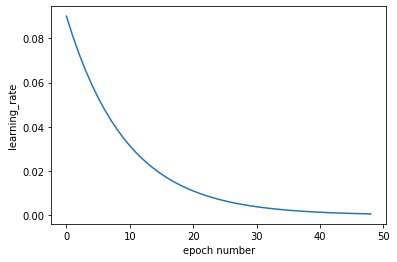

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(changed_lr)
plt.ylabel('learning_rate')
plt.xlabel('epoch number')

In [ ]:
%reload_ext tensorboard
!rm -rf ./logs/

In [20]:

def scheduler(epoch,lr):
    if (epoch+1)%3==0:
        changed_lr=lr*(1-0.05)**epoch
        return changed_lr
    return lr


In [21]:
import datetime
from tensorflow.keras import layers
from tensorflow import keras
def create_model_1(X_train,y_train,X_test,y_test):
    input_layer=Input(shape=(2,))
    layer1=Dense(50,activation='tanh',kernel_initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=1.1))(input_layer)
    layer2=Dense(40,activation='tanh',kernel_initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=1.1))(layer1)
    layer3=Dense(30,activation='tanh',kernel_initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=1.1))(layer2)
    layer4=Dense(20,activation='tanh',kernel_initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=1.1))(layer3)
    layer5=Dense(10,activation='tanh',kernel_initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=1.1))(layer4)
    output_layer = Dense(1,activation='softmax',kernel_initializer=tf.random_uniform_initializer(minval=0., maxval=1.))(layer5)
    model=Model(input_layer,output_layer,name="model")
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.25, patience=1, verbose=1)
    lrschedule = LearningRateScheduler(changeLearningRate, verbose=1)
    best_valimp=val_improve()

    history_own=LossHistory()
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,patience=1, min_lr=0.001)
    c = tf.keras.callbacks.LearningRateScheduler(scheduler)
    checkpoint_path = "training_1/cp.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)
    filepath="model_save/weights-{epoch:02d}-{val_acc:.4f}.hdf5"
 # Create checkpoint  callback 
    cp=ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy',save_best_only=True,verbose=1,mode='auto')
    ear = EarlyStopping(monitor='val_accuracy', min_delta=0.25, patience=2, verbose=1)
    nan=TerminateNaN()

    log_dir="logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)
    callback_list = [cp,best_valimp,reduce_lr,ear,nan,tensorboard_callback,c]
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy',auroc,get_f1])
    model.fit(X_train,y_train,epochs=16,validation_data=(X_test,y_test),batch_size=100,callbacks=callback_list)


create_model_1(X_train,y_train,X_test,y_test)

Epoch 1/16
125/134 [==========================>...] - ETA: 0s - loss: 7.6319 - accuracy: 0.4995 - auroc: 0.5000 - get_f1: 0.6646
Epoch 00001: val_accuracy improved from -inf to 0.49848, saving model to training_1/cp.ckpt
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets
134/134 [==============================] - 2s 12ms/step - loss: 7.6132 - accuracy: 0.5007 - auroc: 0.5000 - get_f1: 0.6657 - val_loss: 7.6477 - val_accuracy: 0.4985 - val_auroc: 0.5000 - val_get_f1: 0.6633 - lr: 0.1000
Epoch 2/16
130/134 [============================>.] - ETA: 0s - loss: 7.6141 - accuracy: 0.5007 - auroc: 0.5000 - get_f1: 0.6658
Epoch 00002: val_accuracy did not improve from 0.49848
134/134 [==============================] - 1s 5ms/step - loss: 7.6132 - accuracy: 0.5007 - auroc: 0.5000 - get_f1: 0.6659 - val_loss: 7.6477 - val_accuracy: 0.4985 - val_auroc: 0.5000 - val_get_f1: 0.6633 - lr: 0.0100
Epoch 3/16
128/1

In [22]:
def create_model_2(X_train,y_train,X_test,y_test):
    input_layer=Input(shape=(2,))
    layer1=Dense(50,activation='relu',kernel_initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=1.))(input_layer)
    layer2=Dense(40,activation='relu',kernel_initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=1.))(layer1)
    layer3=Dense(30,activation='relu',kernel_initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=1.))(layer2)
    layer4=Dense(20,activation='relu',kernel_initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=1.))(layer3)
    layer5=Dense(10,activation='relu',kernel_initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=1.))(layer4)
    output_layer = Dense(1,activation='softmax',kernel_initializer=tf.random_uniform_initializer(minval=0., maxval=1.))(layer5)
    model=Model(input_layer,output_layer,name="model")
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.25, patience=1, verbose=1)
    lrschedule = LearningRateScheduler(changeLearningRate, verbose=1)
    best_valimp=val_improve()

    history_own=LossHistory()
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,patience=1, min_lr=0.001)
    c = tf.keras.callbacks.LearningRateScheduler(scheduler)
    checkpoint_path = "training_1/cp.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)
    filepath="model_save/weights-{epoch:02d}-{val_acc:.4f}.hdf5"
 # Create checkpoint  callback 
    cp=ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy',save_best_only=True,verbose=1,mode='auto')
    ear = EarlyStopping(monitor='val_accuracy', min_delta=0.25, patience=2, verbose=1)
    nan=TerminateNaN()

    log_dir="logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)
    callback_list = [cp,best_valimp,reduce_lr,ear,nan,tensorboard_callback,c]
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy',auroc,get_f1])
    model.fit(X_train,y_train,epochs=16,validation_data=(X_test,y_test),batch_size=100,callbacks=callback_list)


create_model_2(X_train,y_train,X_test,y_test)

Epoch 1/16
118/134 [=========================>....] - ETA: 0s - loss: 7.5277 - accuracy: 0.5064 - auroc: 0.5000 - get_f1: 0.6709
Epoch 00001: val_accuracy improved from -inf to 0.49848, saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets
134/134 [==============================] - 1s 11ms/step - loss: 7.6132 - accuracy: 0.5007 - auroc: 0.5000 - get_f1: 0.6657 - val_loss: 7.6477 - val_accuracy: 0.4985 - val_auroc: 0.5000 - val_get_f1: 0.6633 - lr: 0.1000
Epoch 2/16
124/134 [==========================>...] - ETA: 0s - loss: 7.6074 - accuracy: 0.5011 - auroc: 0.5000 - get_f1: 0.6661
Epoch 00002: val_accuracy did not improve from 0.49848
134/134 [==============================] - 1s 4ms/step - loss: 7.6132 - accuracy: 0.5007 - auroc: 0.5000 - get_f1: 0.6658 - val_loss: 7.6477 - val_accuracy: 0.4985 - val_auroc: 0.5000 - val_get_f1: 0.6633 - lr: 0.0100
Epoch 3/16
125/134 [==========================>...] - ETA: 0s - loss: 7.6100 - accuracy: 0.5010 -

In [23]:
def create_model_3(X_train,y_train,X_test,y_test):
    input_layer=Input(shape=(2,))
    layer1=Dense(50,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=None))(input_layer)
    layer2=Dense(40,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=None))(layer1)
    layer3=Dense(30,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=None))(layer2)
    layer4=Dense(20,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=None))(layer3)
    layer5=Dense(10,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=None))(layer4)
    output_layer = Dense(1,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=30))(layer5)
    model=Model(input_layer,output_layer,name="model")
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.25, patience=1, verbose=1)
    lrschedule = LearningRateScheduler(changeLearningRate, verbose=1)
    best_valimp=val_improve()

    history_own=LossHistory()
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,patience=1, min_lr=0.0001)
    c = tf.keras.callbacks.LearningRateScheduler(scheduler)
    checkpoint_path = "training_1/cp.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)
    filepath="model_save/weights-{epoch:02d}-{val_acc:.4f}.hdf5"
 # Create checkpoint  callback 
    cp=ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy',save_best_only=True,verbose=1,mode='auto')
    ear = EarlyStopping(monitor='val_accuracy', min_delta=0.25, patience=2, verbose=1)
    nan=TerminateNaN()

    log_dir="logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)
    callback_list = [cp,best_valimp,reduce_lr,ear,nan,tensorboard_callback,c]
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy',auroc,get_f1])
    model.fit(X_train,y_train,epochs=16,validation_data=(X_test,y_test),batch_size=100,callbacks=callback_list)


create_model_3(X_train,y_train,X_test,y_test)

Epoch 1/16
125/134 [==========================>...] - ETA: 0s - loss: 7.6051 - accuracy: 0.5013 - auroc: 0.5000 - get_f1: 0.6662
Epoch 00001: val_accuracy improved from -inf to 0.49848, saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets
134/134 [==============================] - 1s 10ms/step - loss: 7.6132 - accuracy: 0.5007 - auroc: 0.5000 - get_f1: 0.6657 - val_loss: 7.6477 - val_accuracy: 0.4985 - val_auroc: 0.5000 - val_get_f1: 0.6633 - lr: 0.1000
Epoch 2/16
124/134 [==========================>...] - ETA: 0s - loss: 7.5767 - accuracy: 0.5031 - auroc: 0.5000 - get_f1: 0.6681
Epoch 00002: val_accuracy did not improve from 0.49848
134/134 [==============================] - 1s 4ms/step - loss: 7.6132 - accuracy: 0.5007 - auroc: 0.5000 - get_f1: 0.6660 - val_loss: 7.6477 - val_accuracy: 0.4985 - val_auroc: 0.5000 - val_get_f1: 0.6633 - lr: 0.0100
Epoch 3/16
122/134 [==========================>...] - ETA: 0s - loss: 7.6034 - accuracy: 0.5014 -

In [24]:
def create_model_4(X_train,y_train,X_test,y_test):
    input_layer=Input(shape=(2,))
    layer1=Dense(50,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=None))(input_layer)
    layer2=Dense(40,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=None))(layer1)
    layer3=Dense(30,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=None))(layer2)
    layer4=Dense(20,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=None))(layer3)
    layer5=Dense(10,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=None))(layer4)
    output_layer = Dense(1,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=30))(layer5)
    model=Model(input_layer,output_layer,name="model")
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.25, patience=1, verbose=1)
    lrschedule = LearningRateScheduler(changeLearningRate, verbose=1)
    best_valimp=val_improve()

    history_own=LossHistory()
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,patience=1, min_lr=0.0001)
    c = tf.keras.callbacks.LearningRateScheduler(scheduler)
    checkpoint_path = "training_1/cp.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)
    filepath="model_save/weights-{epoch:02d}-{val_acc:.4f}.hdf5"
 # Create checkpoint  callback 
    cp=ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy',save_best_only=True,verbose=1,mode='auto')
    ear = EarlyStopping(monitor='val_accuracy', min_delta=0.25, patience=2, verbose=1)
    nan=TerminateNaN()

    log_dir="logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)
    callback_list = [cp,best_valimp,reduce_lr,ear,nan,tensorboard_callback,c]
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy',auroc,get_f1])
    model.fit(X_train,y_train,epochs=16,validation_data=(X_test,y_test),batch_size=100,callbacks=callback_list)


create_model_4(X_train,y_train,X_test,y_test)

Epoch 1/16
130/134 [============================>.] - ETA: 0s - loss: 7.5906 - accuracy: 0.5022 - auroc: 0.5000 - get_f1: 0.6669
Epoch 00001: val_accuracy improved from -inf to 0.49848, saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets
134/134 [==============================] - 2s 11ms/step - loss: 7.6132 - accuracy: 0.5007 - auroc: 0.5000 - get_f1: 0.6656 - val_loss: 7.6477 - val_accuracy: 0.4985 - val_auroc: 0.5000 - val_get_f1: 0.6633 - lr: 0.0010
Epoch 2/16
125/134 [==========================>...] - ETA: 0s - loss: 7.6161 - accuracy: 0.5006 - auroc: 0.5000 - get_f1: 0.6661
Epoch 00002: val_accuracy did not improve from 0.49848
134/134 [==============================] - 1s 5ms/step - loss: 7.6132 - accuracy: 0.5007 - auroc: 0.5000 - get_f1: 0.6662 - val_loss: 7.6477 - val_accuracy: 0.4985 - val_auroc: 0.5000 - val_get_f1: 0.6633 - lr: 1.0000e-04
Epoch 3/16
126/134 [===========================>..] - ETA: 0s - loss: 7.6161 - accuracy: 0.50